# **Marine Heatwaves in the Rockall Trough**

The data was downloaded from https://scotmarphys.github.io/ScotMarPhys.OSNAP-Mooring-Processing.io/. And the algorithm for working with marine heatwaves by Hobday et al. (2016) was downloaded here: https://github.com/ecjoliver/marineHeatWaves.

## Read in packages for this script

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
import xarray as xr
import cmocean as cm
import marineHeatWaves as mhw
from datetime import date

In [2]:
import warnings
#warnings.filterwarnings("ignore")

## Loading the Data

The depth variable was turned into a coordinate and the dataset was reduced to contain only the temperature data we are interested in. The temperature data was converted from K into °C to make it easier to understand. 

In [3]:
file_name = "data/Rockall-Trough-Mooring-Time-Series-2020.nc"
ds = xr.open_dataset(file_name)

# making DEPTH a coordinate -› allows for calling specific depths (instead of the awkwared 20db grid the ds had before)
ds.coords['DEPTH'] = ds.PRES

# overwrite dataset and select only the variables of interst (temperature data)
ds = ds[['TG_EAST', 'TG_WEST']]

In [4]:
# creating two new variables in the ds that have the unit °C for temperature instead of K

# for TG_EAST
ds['TG_EAST_C'] = ds.TG_EAST-273.15
ds.TG_EAST_C.attrs = ds.TG_EAST.attrs 
ds.TG_EAST_C.attrs['units'] = 'degC'
ds.TG_EAST_C.attrs

# and TG_WEST
ds['TG_WEST_C'] = ds.TG_WEST-273.15
ds.TG_WEST_C.attrs = ds.TG_WEST.attrs 
ds.TG_WEST_C.attrs['units'] = 'degC'
ds.TG_WEST_C.attrs;

ds

<xarray.Dataset>
Dimensions:    (DEPTH: 101, TIME: 4667)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-06-01 ... 2020-10-20
  * DEPTH      (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
Data variables:
    TG_EAST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_EAST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/24)
    title:                         CLASS Rockall Trough mooring data 06/2014-...
    institution:                   Scottish Association for Marine Science, S...
    history:                       Delayed time processed quality controlled
    id:                            Rockall-Trough-Mooring-Time-Series-2020
    source:                        subsurface mooring
    project:                       Climate Linked Atlantic Sector Science
    ...                            ...
    citation:                      These data were collected and made freely ...
    acknowledgement:               Funding source: the UK Natural Environment...
    date_created:                  2021-04-15T23:49:44Z
    date_modified:                 2021-04-15T23:49:44Z
    processing_level:              
    QC_indicator:

## A contour plot of the temperature data

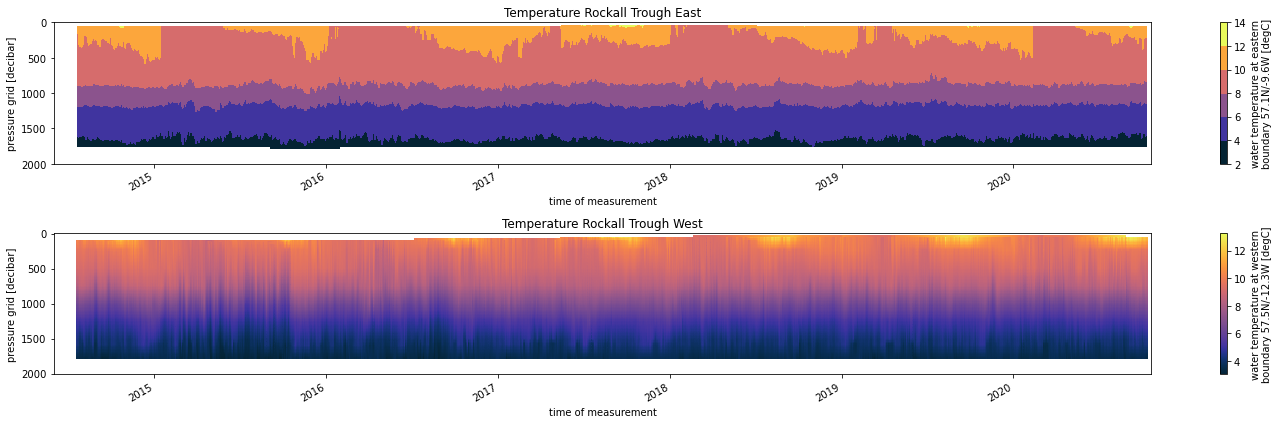

In [302]:
# notes: 
# yincrease = False -› inverts the y-axis, setting ylim = (high, low) does the same (but limets need to be known)
# plot.contourf() creates a plot with more clearly defined contours

fig, ax = plt.subplots(2, 1, figsize = (20, 6))

ds.TG_EAST_C.plot.contourf(ax=ax[0], x = 'TIME', y = 'DEPTH', yincrease = False, cmap = cm.cm.thermal);
ax[0].set_title("Temperature Rockall Trough East");

ds.TG_WEST_C.plot(ax=ax[1], x = 'TIME', yincrease = False, cmap = cm.cm.thermal);
ax[1].set_title("Temperature Rockall Trough West");

fig.tight_layout();

## Creating line plots to compare temperature at the surface and bottom EAST and WEST

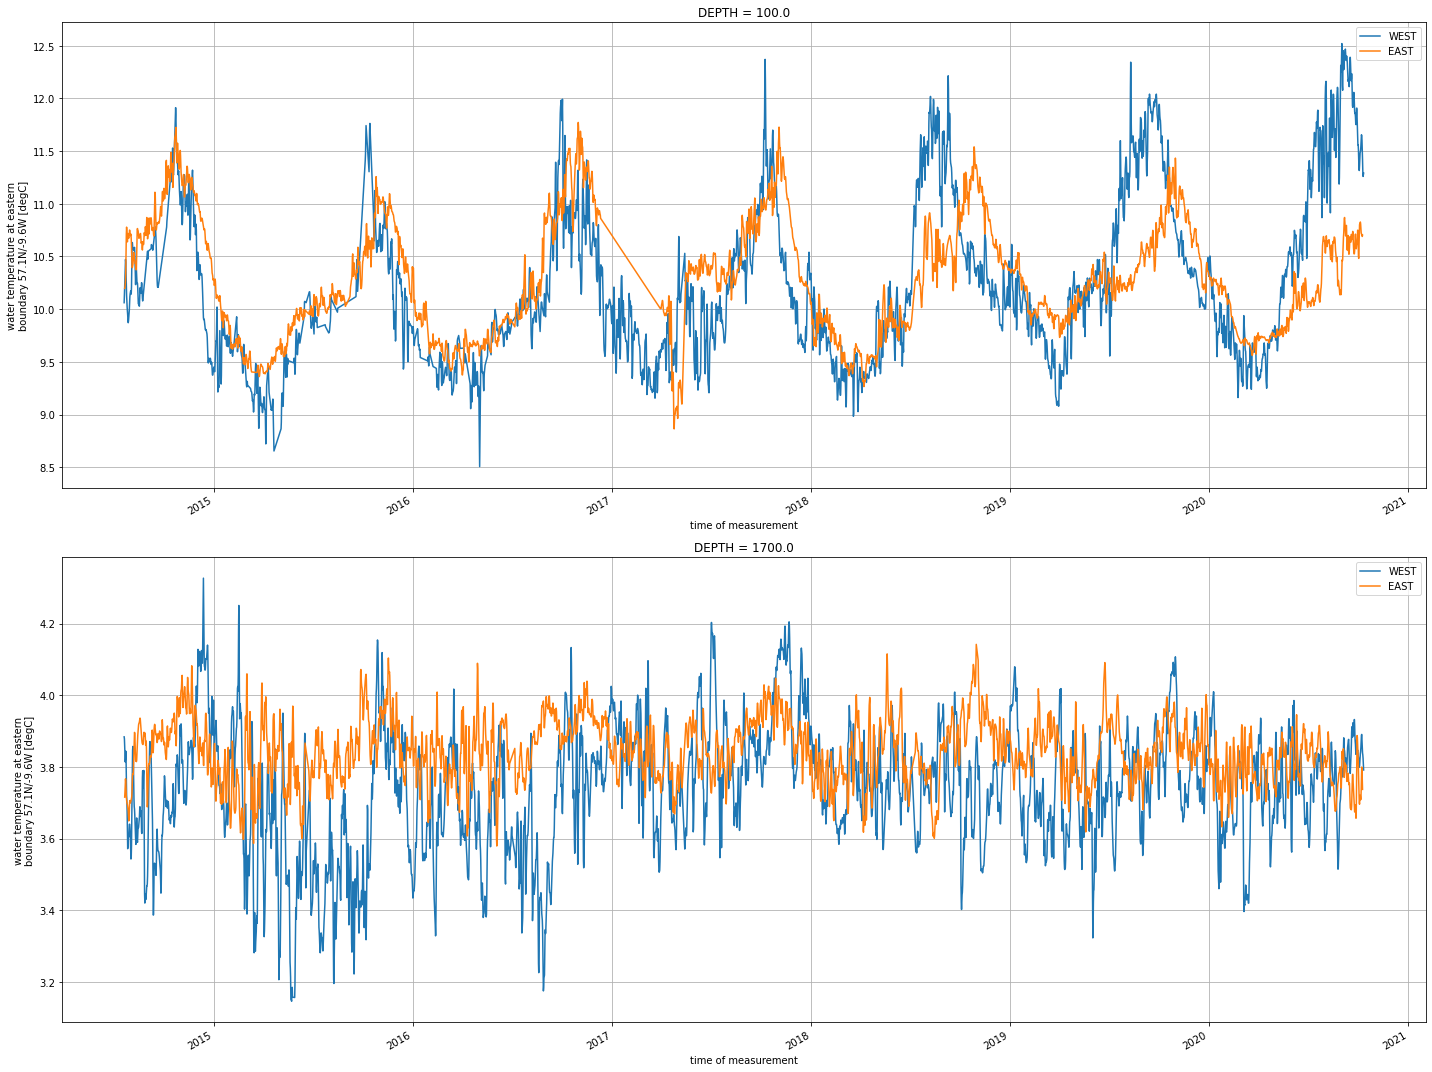

In [6]:
# extracting one temperature profile by slicing the dataset at a specific depth
# creating 4 plots that show the temperature at 100m and 1700m from the eastern and western boundary

fig, ax = plt.subplots(2, 1, figsize = (20, 15))

ds.TG_WEST_C.sel(DEPTH = 100).plot(ax=ax[0], label = 'WEST');
ds.TG_WEST_C.sel(DEPTH = 1700).plot(ax=ax[1], label = 'WEST');

ds.TG_EAST_C.sel(DEPTH = 100).plot(ax=ax[0], label = 'EAST');
ds.TG_EAST_C.sel(DEPTH = 1700).plot(ax=ax[1], label = 'EAST');

for axs in ax: 
    axs.legend()
    axs.grid()
#ax[1].legend()

fig.tight_layout();

## Space to experiment with plots

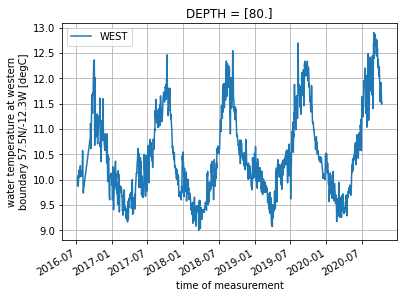

In [13]:
ds.TG_WEST_C.sel(DEPTH=[80], method = 'nearest').plot.line(x = 'TIME', label = 'WEST');
#ds.TG_EAST_C.sel(DEPTH=[60], method = 'nearest').plot.line(x = 'TIME', label = 'EAST');
plt.grid()

plt.legend();

# **Working with the algorithm**
## Resampling the dataset

Before continuing the dataset needs to be resampled to fit the algorithm. By reducing the resolution to 1 day (1D) instead of half days(12 hour periods) the algorithm can work with the data input. When resampling the dataset I made sure that the ds attributes did not get lost.

In [8]:
# resampling the dataset -› so that we have full days instead of half days -› by calculating the mean

ds1D = ds.resample(TIME = "1D").mean();

In [9]:
# making sure that the new 1D data set has the same attributes as the original ds

ds1D.attrs = ds.attrs
ds1D

<xarray.Dataset>
Dimensions:    (DEPTH: 101, TIME: 2334)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-06-01 2014-06-02 ... 2020-10-20
  * DEPTH      (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
Data variables:
    TG_EAST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_EAST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/24)
    title:                         CLASS Rockall Trough mooring data 06/2014-...
    institution:                   Scottish Association for Marine Science, S...
    history:                       Delayed time processed quality controlled
    id:                            Rockall-Trough-Mooring-Time-Series-2020
    source:                        subsurface mooring
    project:                       Climate Linked Atlantic Sector Science
    ...                            ...
    citation:                      These data were collected and made freely ...
    acknowledgement:               Funding source: the UK Natural Environment...
    date_created:                  2021-04-15T23:49:44Z
    date_modified:                 2021-04-15T23:49:44Z
    processing_level:              
    QC_indicator:

## Setting the variables that go into the algorithm

In [78]:
# .toordinal turns the date into a number that the algorithm can process
t = np.arange(date(2014,6,1).toordinal(),date(2020,10,20).toordinal()+1,1)

In [148]:
# by using .squeeze().values we are first removing any other depth and then turning the data into a 1d numpy array 
    # without doing this the dat will still be in an array and the algorithm can't handle it
temp = ds1D.TG_EAST_C.sel(DEPTH = [400], method = 'nearest').squeeze().values

In [79]:
display (temp)
t

array([9.575273, 9.576393, 9.57711 , ..., 9.780866, 9.783682, 9.786137],
      dtype=float32)

array([735385, 735386, 735387, ..., 737716, 737717, 737718])

## **Marien Heatwaves**  (MHW)

In [80]:
mhws, clim = mhw.detect(t, temp)

## **Marine Cold Spells** (MCS)

In [81]:
mcss, clim_cold = mhw.detect(t, temp, coldSpells = True)

In [82]:
# print results of functions

print(mhws['n_events'])
print(mcss['n_events'])

20
15


## Creating a function for plotting the MHWs / MCS

In [328]:
def plot_mhws(t,temp,clim):

    fig, ax = plt.subplots(figsize= (15,5))
    plt.plot(t,temp,label='temp', color='grey', linewidth='.75')
    plt.plot(t,clim['seas'],label='clim', color='g', linewidth='3')
    plt.plot(t,clim['thresh'], label='thresh', color='b', linestyle=':')
    #plt.plot(ds1D.TIME,clim_cold['thresh'], label='thresh')
    plt.legend()

    yloc = YearLocator()
    mloc = MonthLocator()
    ax.xaxis.set_major_locator(yloc)
    ax.xaxis.set_minor_locator(mloc)

    plt.grid()


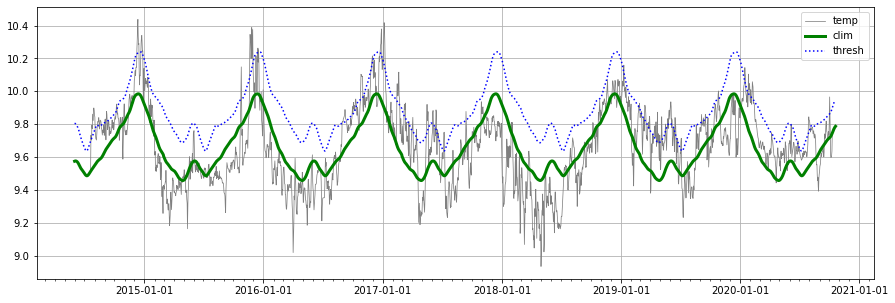

In [329]:
plot_mhws(ds1D.TIME,temp,clim)

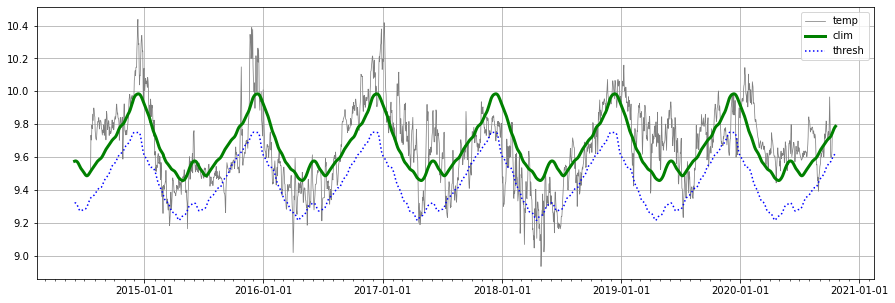

In [330]:
plot_mhws(ds1D.TIME,temp,clim_cold)

# Summary
I am making progress :). By using functions I can make more complex things easier to repeat. 
- learn how to iterate
- understand all outputs of the mhw function
- look at mooring set up (shallowest depth with longterm data seems to be 80m)
### Ideas
- use a long term climatology for the climatology that the algorithm uses <br>
    -› EN4 <br>
    -› MIMOC
- read the paper on data gaps/short term data and the effect on the results calculated by the algoritm

In [260]:
mhw.detect(t,
        temp,
        climatologyPeriod=[2014.0, 2020.0],
        pctile=90,
        windowHalfWidth=5,
        smoothPercentile=True, # we want a moving average
        smoothPercentileWidth=31, # if shortened nos of marine heatwaves reduces
        minDuration=5,
        joinAcrossGaps=True, # this referst to marine heatwaves
        maxGap=2,
        maxPadLength=False,# this pads the data -› everything is badded
        coldSpells=False,
        alternateClimatology=False,
        Ly=False,) # oter year lengts ... eg. 360 from climate model

MHWs, clim_1 = mhw.detect(t, temp, pctile=90, minDuration=10);

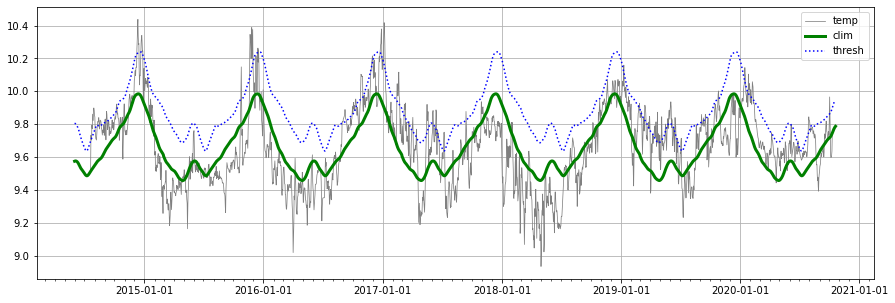

In [331]:
plot_mhws(ds1D.TIME, temp, clim_1)

## Function summarising the details for specific mhw event i

In [361]:
def mhws_details(mhws,i):
    i = i-1
    print('Number of MHWs:', mhws['n_events'])
    print('MHW number:', i+1)
    print('Start Date:', mhws['date_start'][i])
    print('End Date:', mhws['date_end'][i])
    print('Duration:', mhws['duration'][i], 'days')
    print('Max intensity relative to clim:', mhws['intensity_max'][i])
    print('Max intensity relative to thresh:', mhws['intensity_max_relThresh'][i])
    print('Max absolute temp:',mhws['intensity_max_abs'][i])
    print('———————')

In [376]:
i=[1,4]
for i in i:
    mhws_details(mhws, i)

Number of MHWs: 20
MHW number: 1
Start Date: 2014-07-23
End Date: 2014-08-02
Duration: 11 days
Max intensity relative to clim: 0.35768970366447306
Max intensity relative to thresh: 0.14715615549395267
Max absolute temp: 9.898758
———————
Number of MHWs: 20
MHW number: 4
Start Date: 2014-12-22
End Date: 2014-12-27
Duration: 6 days
Max intensity relative to clim: 0.3804028726393174
Max intensity relative to thresh: 0.10394902383127658
Max absolute temp: 10.340317
———————


In [359]:
#mhw.detect?

## Copied plot from example_synthetic.ipynb script and adapted it to run in this script

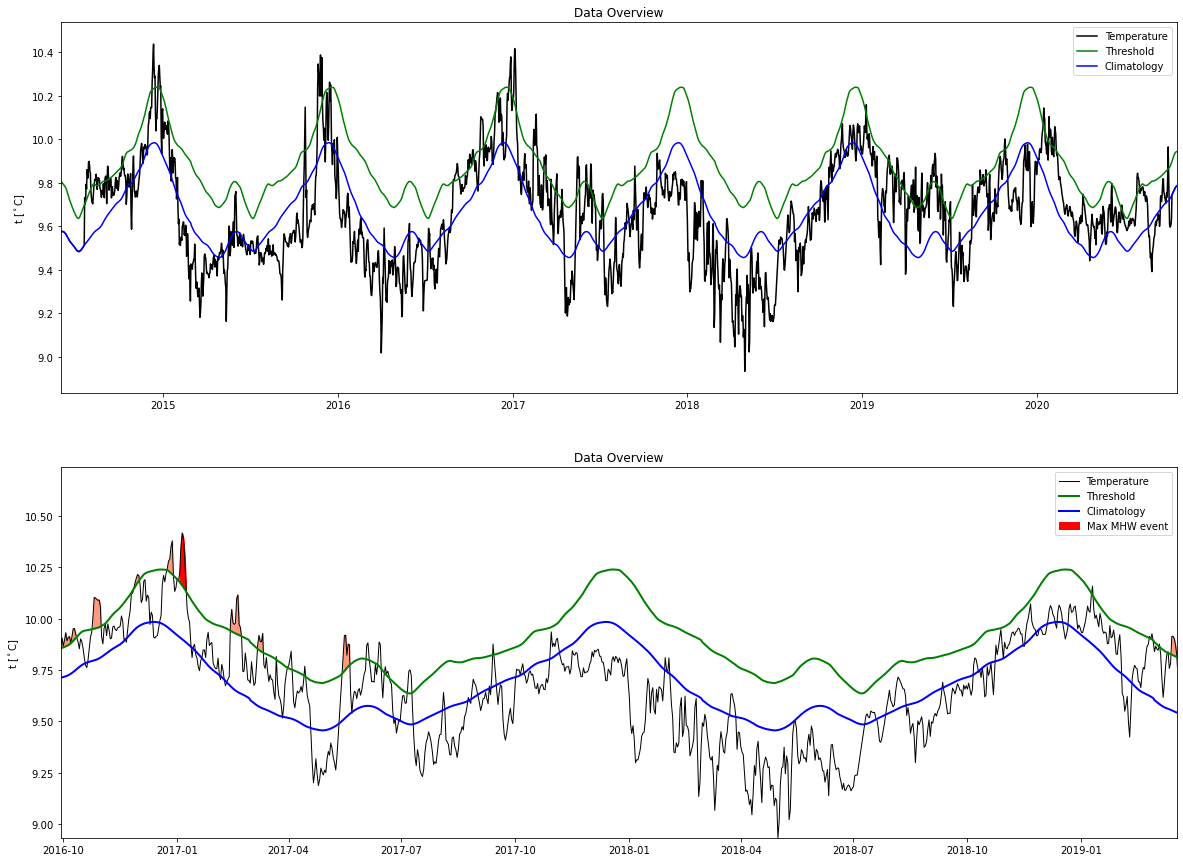

In [426]:
# copy past plot from example
dates = [date.fromordinal(tt.astype(int)) for tt in t]
#dates_mhws = [date.fromordinal(tt.astype(int)) for tt in mhws]
ev = np.argmax(mhws['intensity_max'])

plt.figure(figsize=(20,15))
plt.subplot(2,1,1)

# Plot t, seasonal cycle, and threshold
plt.plot(dates, temp, 'k-', label = 'Temperature')
plt.plot(dates, clim['thresh'], 'g-', label = 'Threshold')
plt.plot(dates, clim['seas'], 'b-', label = 'Climatology')
plt.legend()
plt.title('Data Overview')
plt.xlim(dates[0], dates[-1])
plt.ylim(temp.min()-0.1, temp.max()+0.1)
plt.ylabel(r't [$^\circ$C]')
plt.subplot(2,1,2)

# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+9, 1):
    t1 = np.where(t==mhws['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], temp[t1:t2+1], clim['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest and shade accordingly
t1 = np.where(t==mhws['time_start'][ev])[0][0]
t2 = np.where(t==mhws['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], temp[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r', label = 'Max MHW event')
# Plot t, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, temp, 'k-', linewidth=1, label = 'Temperature')
plt.plot(dates, clim['thresh'], 'g-', linewidth=2, label = 'Threshold')
plt.plot(dates, clim['seas'], 'b-', linewidth=2, label = 'Climatology')
plt.legend()
plt.title('Data Overview')
plt.xlim(mhws['date_start'][ev-4], mhws['date_end'][ev+4])
plt.ylim(temp.min(), temp.max()+0.3)
plt.ylabel(r't [$^\circ$C]');

## Plotting some stats codealso from example_synthetic.ipynb 

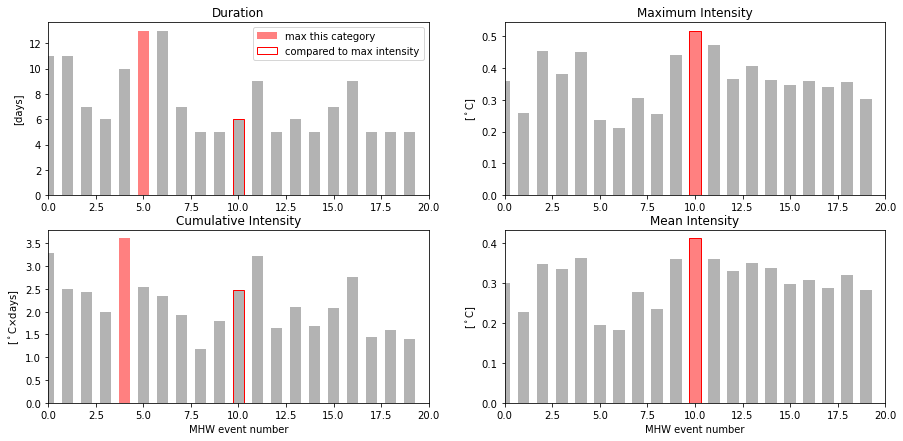

In [431]:
plt.figure(figsize=(15,7))

# Duration
plt.subplot(2,2,1)
evMax = np.argmax(mhws['duration'])
plt.bar(range(mhws['n_events']), mhws['duration'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['duration'][evMax], width=0.6, color=(1,0.5,0.5), label = 'max this category')
plt.bar(ev, mhws['duration'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none', label = 'compared to max intensity')
plt.xlim(0, mhws['n_events'])
plt.ylabel('[days]')
plt.legend()
plt.title('Duration')

# Maximum intensity
plt.subplot(2,2,2)
evMax = np.argmax(mhws['intensity_max'])
plt.bar(range(mhws['n_events']), mhws['intensity_max'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_max'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_max'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.ylabel(r'[$^\circ$C]')
plt.title('Maximum Intensity')

# Mean intensity
plt.subplot(2,2,4)
evMax = np.argmax(mhws['intensity_mean'])
plt.bar(range(mhws['n_events']), mhws['intensity_mean'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_mean'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_mean'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.title('Mean Intensity')
plt.ylabel(r'[$^\circ$C]')
plt.xlabel('MHW event number')

# Cumulative intensity
plt.subplot(2,2,3)
evMax = np.argmax(mhws['intensity_cumulative'])
plt.bar(range(mhws['n_events']), mhws['intensity_cumulative'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws['intensity_cumulative'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws['intensity_cumulative'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws['n_events'])
plt.title(r'Cumulative Intensity')
plt.ylabel(r'[$^\circ$C$\times$days]')
plt.xlabel('MHW event number');

## More copied code to create plots

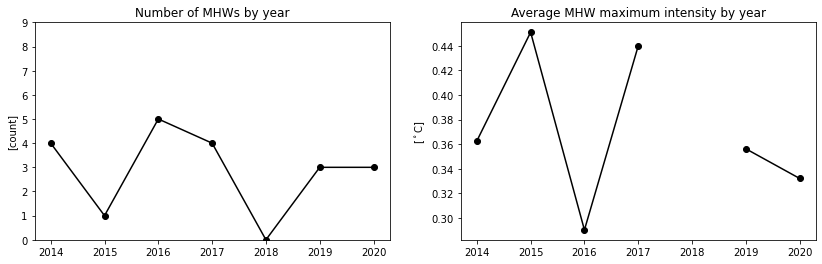

In [435]:
mhwBlock = mhw.blockAverage(t, mhws)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(mhwBlock['years_centre'], mhwBlock['count'], 'k-o')
plt.ylim(0,9)
plt.ylabel('[count]')
plt.title('Number of MHWs by year')

plt.subplot(1,2,2)
plt.plot(mhwBlock['years_centre'], mhwBlock['intensity_max'], 'k-o')
plt.ylabel(r'[$^\circ$C]')
plt.title('Average MHW maximum intensity by year');

In [438]:
# some stats

mean, trend, dtrend = mhw.meanTrend(mhwBlock)
print("There are on average " + str(mean['count']) + " MHWs in each year, \n \
with a linear trend of " + str(trend['count']) + " MHW events per year \n \
This trend is statistically significant (p<0.05): " \
+ str(np.abs(trend['count']) > dtrend['count']) + "\n")

print ("The average maximum intensity is " + str(mean['intensity_max']) + " deg. C, \n \
with a linear trend of " + str(trend['intensity_max']) + " deg. C per year \n \
This trend is statistically significant (p<0.05): " \
+ str(np.abs(trend['intensity_max']) > dtrend['intensity_max']))

There are on average 2.857142857142857 MHWs in each year, 
 with a linear trend of -0.14285714285714277 MHW events per year 
 This trend is statistically significant (p<0.05): False

The average maximum intensity is 0.3707571844773428 deg. C, 
 with a linear trend of -0.00742986440610803 deg. C per year 
 This trend is statistically significant (p<0.05): False


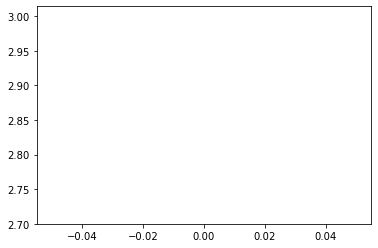

In [446]:
# try and plot the things above to better understand the linear trend